In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from neupy import algorithms, layers, estimators, environment

In [2]:
def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

In [3]:
df=Database()
df = df[np.isfinite(df['FP Exp.'])]
x = df.loc[:,'-H':'aaCa']

In [4]:
y = df['FP Exp.']

In [5]:
array_x = x.values

In [6]:
array_y = y.values

In [7]:
#scaler = MinMaxScaler()

In [8]:
#target_scaler = preprocessing.MinMaxScaler()

In [9]:
#rescaledX = scaler.fit_transform(array_x)

In [10]:
#target = target_scaler.fit_transform(np.reshape(array_y, (-1, 1)))

In [11]:
#target.max()

In [12]:
#np.set_printoptions(precision=4) # summarize transformed data for x

In [13]:
x_train, x_test, y_train, y_test = train_test_split(array_x, array_y, test_size=0.15)

In [26]:
cgnet = algorithms.GRNN(std=0.3,verbose=True,)


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.3



In [27]:
cgnet.train(x_train, y_train)
y_predict = cgnet.predict(x_test)

In [28]:
estimators.rmse(y_predict, y_test)

32.071695451383626

In [29]:
mean_squared_error(y_test, y_predict)

1028.5936491263005

In [30]:
r2_score(y_test, y_predict)

0.710177463466652

[WARN] There is no data to plot


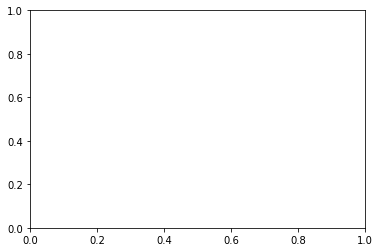

In [31]:
from neupy import plots
plots.error_plot(cgnet)

In [20]:
y_test = target_scaler.inverse_transform(y_test.reshape((-1, 1)))
y_predict = target_scaler.inverse_transform(y_predict).T.round(1)
estimators.rmsle(y_predict, y_test)

NameError: name 'target_scaler' is not defined